In [1]:
from plotting_methods import *
from indices import var_cv, lc

#### **Maps of estimated partitioning of variation within completed EuroCORDEX ensemble** [^](00_recreate-plot-explorer.ipynb)

For details of the underlying analysis, see _Characterising spatial structure in climate model ensembles_ (Chandler et al., 2022).


In [2]:
# load the netcdf containing MANOVA data & extract DataArray
da = xr.open_dataset("example_data/tas_12km_eurocordex-anova_20491201-20791130_annual.nc")
da = da[list(da.data_vars)[0]] 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Text(0.5, 1.0, 'Residual uncertainty\n(12%)')

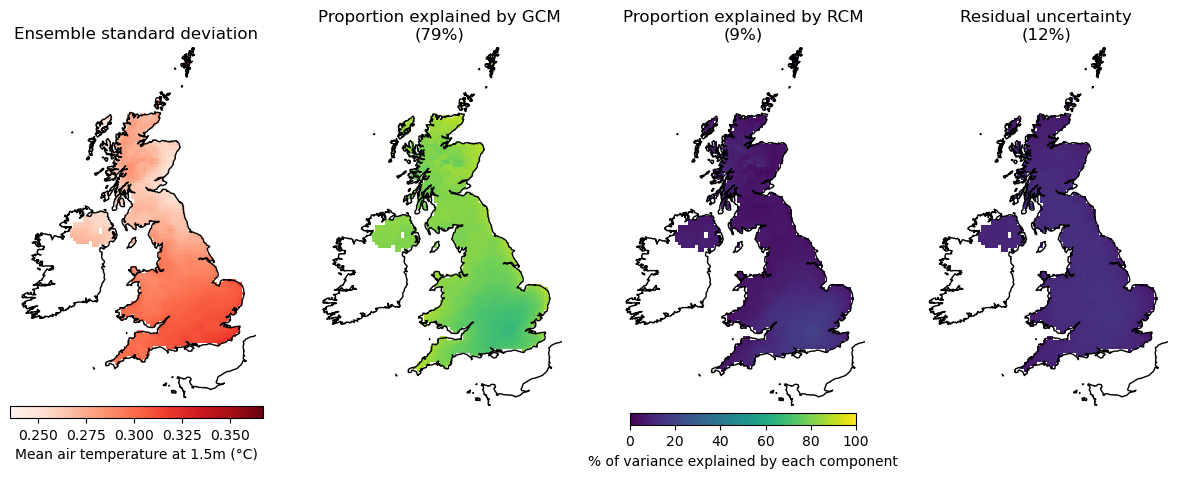

In [3]:
fig, axs = plt.subplots(ncols = 4, figsize = (15,5), sharex = True, sharey = True, subplot_kw = { "projection" : crs_osgb}, dpi= 100, facecolor='w', edgecolor='k')
   
for axz in fig.axes:
    axz.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs = crs_osgb)
    axz.set_axis_off()
    axz.coastlines(zorder = 99)

# function to quickly format strings of variance explained
def ve_str(v): return "\n("+str(int((da.attrs[v]).round(0)))+"%)"

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ensemble SD

da.sel(src = "sd").plot(ax = axs[0], cmap = fix_cmap(var_cv[da.name]["cmap"], vmin = 1, vmax = 1),
                        cbar_kwargs = {"ax" : axs[:1], "location" : "bottom", "pad" : 0.02, "fraction" : 0.05, "label" : var_cv[da.name]["plot_label"]})
axs[0].set_title("Ensemble standard deviation")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# GCM contribution

da.sel(src = "gcm").plot(ax = axs[1], cmap = "viridis", vmin = 0, vmax = 100,
                        cbar_kwargs = {"ax" : axs[1:], "location" : "bottom", "pad" : 0.02, "fraction" : 0.03, "label" : "% of variance explained by each component"})
axs[1].set_title("Proportion explained by GCM"+ve_str("estve_G2"))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# RCM contribution

da.sel(src = "rcm").plot(ax = axs[2], cmap = "viridis", vmin = 0, vmax = 100, add_colorbar = False)
axs[2].set_title("Proportion explained by RCM"+ve_str("estve_R2"))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# residual uncertainty

da.sel(src = "res").plot(ax = axs[3], cmap = "viridis", vmin = 0, vmax = 100, add_colorbar = False)
axs[3].set_title("Residual uncertainty"+ve_str("estve_res"))